# PCA para Visualizacion de Datos

Para muchas aplicaciones es de utilidad **tener la posibilidad de visualizar la informacion, en particular en 2 o 3 dimensiones.** Uno de los usos que se le puede dar a PCA es reducir dimensiones para visualizar datos.

En este ejemplo con el set de datos iris de 4 dimensiones, haremos una reduccion para poder visualizarlo en 2 dimensiones.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Interactive magics - comment out if running from another script
%matplotlib inline
%qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

## Carga de datos de iris

In [3]:
iris = sns.load_dataset("iris")
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Visualizando las especies
![title](iris-machinelearning.png)

## Estandarizando la informacion

Es necesario realizar feature scaling (lograr que tengan media = 0 y varianza = 1), para que performe correctamente PCA. Para ello usaremos un ```StandardScaler``` provisto por sklearn, pero podria plantearse como una etapa de pre procesamiento de los datos. 

Mas informacion aqui: [http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

In [4]:
# separando los features y estandarizando
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.loc[:, features].values
x = StandardScaler().fit_transform(x)

## Aplicando PCA para proyectar a 2D

In [5]:
from sklearn.decomposition import PCA
# en este caso aplicamos PCA indicando la cantidad de componentes 
# que queremos, 2, para representar en 2 dimensiones.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
# reconstruimos el data frame para poder representarlo
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
# concatenamos los valores de species para poder reconstruir el set de datos.
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

In [7]:
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


## Visualizando la informacion reducida en 2D

Podemos plantear la siguiente visualizacion realizando un plot en 
2 dimensiones con la informacion obtenida de tal forma que podamos 
realizar un analisis en 2D de la informacion de 4 dimensiones.

Un aspecto a tener en cuenta que luego de la reduccion de dimensiones, usualmente no hay un significado especifico asignado a cada principal component. Estas son dos nuevas dimensiones principales de variacion de los datos.

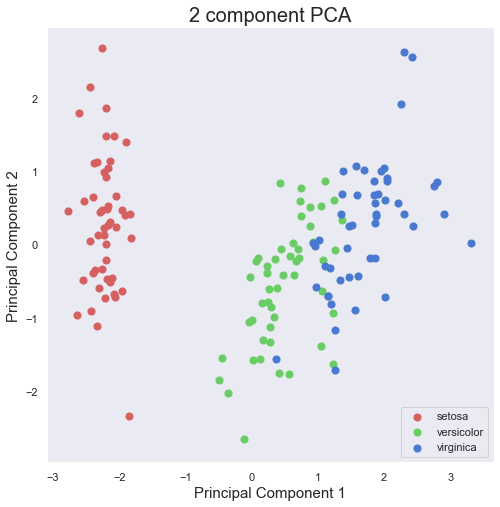

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Observaciones

A partir del plot podemos ver claramente que hay una separacion entre las 3, en particular entre setosa y versicolor y virginica.

## Total Variance y Explained Variance

La "total variance" es la suma de las varianzas de cada componente principal

La "explained variance" indica cuanta varianza (cuanta informacion) se "conserva" y/o puede ser atribuida a cada componente principal.

In [9]:
print("Explained Variance", pca.explained_variance_)

Explained Variance [2.93808505 0.9201649 ]


In [10]:
print("Explained Variance ratio",pca.explained_variance_ratio_)

Explained Variance ratio [0.72962445 0.22850762]


In [11]:
print("Varianza acumulada", sum(pca.explained_variance_ratio_))

Varianza acumulada 0.9581320720000164


A partir de los atributos de PCA podemos ver cuanta acumula cada una de las principal components y vemos que en su totalidad la representacion acumula un 95.80% de varianza (informacion).

# Cómo utilizar SVD para llegar al mismo resultado que PCA

### 1) Debemos estandarizar los datos de forma tal que tengan media 0 y varianza 1

In [12]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.loc[:, features].values
x = StandardScaler().fit_transform(x)

### 2) Se calcula la matriz de covarianza

In [13]:
n = 150 ## es el numero de observaciones del set (num de filas)
x_cov_matrix = np.dot(x.T,x) / 150.0

### 3) Se aplica la SVD sobre la matriz de covarianza

In [14]:
u, s, vt = np.linalg.svd(x_cov_matrix, full_matrices=True)

### 4) Se eligen las K componentes que se quieran utilizar y luego se proyectan los puntos sobre Vt 

In [15]:
k = 2
vt_k_eigenvector = vt[:k,:]
data_in_k_dimensions = np.dot(x,vt_k_eigenvector.T)
data_in_k_dimensions.shape

(150, 2)

### 5) Se pueden graficar los resultados obtenidos

In [16]:
principalDf = pd.DataFrame(data = data_in_k_dimensions
             , columns = ['First Eigenvector', 'Second Eigenvector'])
# concatenamos los valores de species para poder reconstruir el set de datos.
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)
finalDf.head()

,First Eigenvector,Second Eigenvector,species
0,2.264703,-0.480027,setosa
1,2.080961,0.674134,setosa
2,2.364229,0.341908,setosa
3,2.299384,0.597395,setosa
4,2.389842,-0.646835,setosa


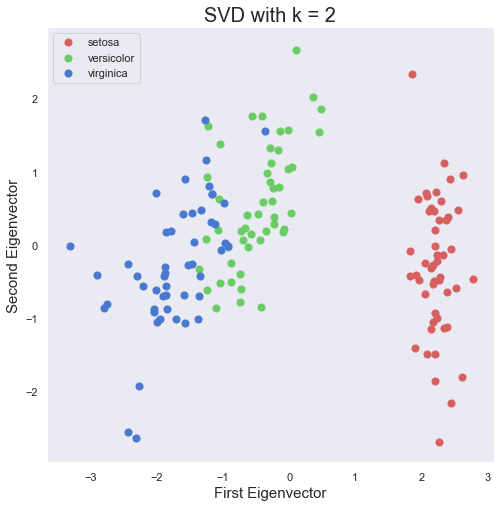

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Eigenvector', fontsize = 15)
ax.set_ylabel('Second Eigenvector', fontsize = 15)
ax.set_title('SVD with k = 2', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'First Eigenvector']
               , finalDf.loc[indicesToKeep, 'Second Eigenvector']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [48]:
s

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])